#### nem todos os métodos iterativos vão convergir fazer a questão 6.26, página 154

In [ ]:
def funct(x):
    sum_value = 0
    for i in range(1, x + 1):
        sum_value += 1/((i + 1)*i)
    erro(sum_value)
    return sum_value


def erro(n):
    error_perc = ((1 - n)/(1))*100
    print(f'Erro: {round(error_perc, 3)}%')

funct(100000)

Erro: 0.001%


0.9999900001000122

In [7]:
# questão do produtório 1/n(n+1)


def main(n):
    value = 1
    for x in range(1, n + 1):
        value *= 1/((x + 1)*x)
    return value

main(2)

0.08333333333333333

In [13]:
# criar outras formas de derivada de primeira ordem

def f(x):
    valor = x**2
    return valor

h = 0.000001
x = 5

derivada = (f(x + h) - f(x))/h
derivada_2 = (f(x + h) - f(x - h))/(2*h) # diferença central
print(derivada)
print(derivada_2)

10.00000100148668
10.00000000139778


In [ ]:
# colocar uma função time para calcular o tempo de execução
# utilizando outros tipos de derivadas

def metodo_newton(x0, tol=1e-6, max_iter=30):
    """
    Implementação do método de Newton para encontrar raízes de f(x) = x² + x - 6

    Parâmetros:
    x0: aproximação inicial
    tol: tolerância (critério de parada)
    max_iter: número máximo de iterações

    Retorna:
    Aproximação da raiz ou None se não convergir
    """

    # Definindo a função e sua derivada
    def f(x):
        return x ** 2 + 6

    def df(x):
        h = 0.001
        derivada = (f(x + h) - f(x)) / h
        return derivada  # Derivada de f(x)

    print("Iteração | x | f(x) | Erro")
    print("----------------------------------")

    for i in range(max_iter):
        fx = f(x0)
        dfx = df(x0)

        # Evitar divisão por zero
        if abs(dfx) < 1e-12:
            print("\nDerivada muito próxima de zero. Método falhou.")
            return None

        x1 = x0 - fx / dfx
        erro = abs(x1 - x0)

        print(f"{i:8} | {x0:.5f} | {fx:.5f} | {erro:.5f}")

        if erro < tol:
            print("\nConvergência alcançada!")
            return x1

        x0 = x1

    print("\nMétodo não convergiu após", max_iter, "iterações.")
    return None


# Encontrando ambas as raízes usando diferentes pontos iniciais
print("=== Buscando a raiz positiva (x ≈ 2) ===")
print('')
raiz_positiva = metodo_newton(x0=150)
if raiz_positiva is not None:
    print(f"\nRaiz positiva encontrada: {raiz_positiva:.6f}")
    print(f"f({raiz_positiva:.6f}) = {raiz_positiva ** 2 + raiz_positiva - 6:.6f}")

print("\n=== Buscando a raiz negativa (x ≈ -3) ===")
print('')
raiz_negativa = metodo_newton(x0=-3.5)
if raiz_negativa is not None:
    print(f"\nRaiz negativa encontrada: {raiz_negativa:.6f}")
    print(f"f({raiz_negativa:.6f}) = {raiz_negativa ** 2 + raiz_negativa - 6:.6f}")

=== Buscando a raiz positiva (x ≈ 2) ===

Iteração | x | f(x) | Erro
----------------------------------
       0 | 150.00000 | 22506.00000 | 75.01975
       1 | 74.98025 | 5628.03790 | 37.52989
       2 | 37.45036 | 1408.52982 | 18.80504
       3 | 18.64533 | 353.64823 | 9.48331
       4 | 9.16202 | 89.94261 | 4.90818
       5 | 4.25384 | 24.09515 | 2.83183
       6 | 1.42201 | 8.02210 | 2.81971
       7 | -1.39770 | 7.95356 | 2.84625
       8 | 1.44855 | 8.09831 | 2.79434
       9 | -1.34579 | 7.81115 | 2.90315
      10 | 1.55736 | 8.42536 | 2.70415
      11 | -1.14680 | 7.31514 | 3.19077
      12 | 2.04398 | 10.17784 | 2.48911
      13 | -0.44513 | 6.19814 | 6.97002
      14 | 6.52489 | 48.57418 | 3.72194
      15 | 2.80295 | 13.85654 | 2.47134
      16 | 0.33162 | 6.10997 | 9.19853
      17 | -8.86691 | 84.62217 | 4.77206
      18 | -4.09485 | 22.76781 | 2.78039
      19 | -1.31446 | 7.72780 | 2.94066
      20 | 1.62620 | 8.64452 | 2.65708
      21 | -1.03088 | 7.06271 | 3.42724
   

In [19]:
def metodo_secante(x0, x1, tol=1e-6, max_iter=1000):
    """
    Implementação do método da Secante para encontrar raízes de f(x) = x² + x - 6

    Parâmetros:
    x0, x1: aproximações iniciais
    tol: tolerância (critério de parada)
    max_iter: número máximo de iterações

    Retorna:
    Aproximação da raiz ou None se não convergir
    """

    def f(x):
        return x ** 2 + x - 6

    print("Iteração | x | f(x) | Erro")
    print("----------------------------------")

    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)

        # Evitar divisão por zero
        if abs(fx1 - fx0) < 1e-12:
            print("\nDiferença entre f(x) muito pequena. Método falhou.")
            return None

        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        erro = abs(x2 - x1)

        print(f"{i + 1:8} | {x2:.5f} | {f(x2):.5f} | {erro:.5f}")

        if erro < tol:
            print("\nConvergência alcançada!")
            return x2

        x0, x1 = x1, x2

    print("\nMétodo não convergiu após", max_iter, "iterações.")
    return None


# Encontrando ambas as raízes usando diferentes pontos iniciais
print("=== Buscando a raiz positiva (x ≈ 2) ===")
raiz_positiva = metodo_secante(x0=1.0, x1=3.0)
if raiz_positiva is not None:
    print(f"\nRaiz positiva encontrada: {raiz_positiva:.6f}")
    print(f"f({raiz_positiva:.6f}) = {raiz_positiva ** 2 + raiz_positiva - 6:.6f}")

print("\n=== Buscando a raiz negativa (x ≈ -3) ===")
raiz_negativa = metodo_secante(x0=-4.0, x1=-2.0)
if raiz_negativa is not None:
    print(f"\nRaiz negativa encontrada: {raiz_negativa:.6f}")
    print(f"f({raiz_negativa:.6f}) = {raiz_negativa ** 2 + raiz_negativa - 6:.6f}")

=== Buscando a raiz positiva (x ≈ 2) ===
Iteração | x | f(x) | Erro
----------------------------------
       1 | 1.80000 | -0.96000 | 1.20000
       2 | 1.96552 | -0.17122 | 0.16552
       3 | 2.00145 | 0.00724 | 0.03593
       4 | 1.99999 | -0.00005 | 0.00146
       5 | 2.00000 | -0.00000 | 0.00001
       6 | 2.00000 | 0.00000 | 0.00000

Convergência alcançada!

Raiz positiva encontrada: 2.000000
f(2.000000) = 0.000000

=== Buscando a raiz negativa (x ≈ -3) ===
Iteração | x | f(x) | Erro
----------------------------------
       1 | -2.80000 | -0.96000 | 0.80000
       2 | -3.05263 | 0.26593 | 0.25263
       3 | -2.99783 | -0.01084 | 0.05480
       4 | -2.99998 | -0.00011 | 0.00215
       5 | -3.00000 | 0.00000 | 0.00002
       6 | -3.00000 | -0.00000 | 0.00000

Convergência alcançada!

Raiz negativa encontrada: -3.000000
f(-3.000000) = -0.000000


In [22]:
import numpy as np
import math

def ponto_fixo(x0, tol=1e-6, max_iter=1000):
    """
    Implementação do método do Ponto Fixo para encontrar a raiz de f(x) = x² + x - 6.
    (x + 1)x = 6
    x = 6/(x + 1)
    Usando g(x) = 6/(x + 1) que satisfaz |g'(x)| < 1 perto das raízes.
    """

    def g(x):
        return 6 - x**2

    print("Iteração | x | g(x) | Erro")
    print("----------------------------------")

    for i in range(max_iter):
        x1 = g(x0)
        erro = abs(x1 - x0)

        print(f"{i:8} | {x0:.5f} | {x1:.5f} | {erro:.5f}")

        if erro < tol:
            print("\nConvergência alcançada!")
            return x1

        x0 = x1

    print("\nMétodo não convergiu após", max_iter, "iterações.")
    return None


# Testando o método com diferentes pontos iniciais
print("=== Testando com x0 = 1.5 ===")
raiz1 = ponto_fixo(x0=1.5)
if raiz1 is not None:
    print(f"Raiz aproximada: {raiz1:.6f}")
    print(f"f({raiz1:.6f}) = {raiz1 ** 2 + raiz1 - 6:.6f}")

print("\n=== Testando com x0 = -2.5 ===")
raiz2 = ponto_fixo(x0=-2.5)
if raiz2 is not None:
    print(f"Raiz aproximada: {raiz2:.6f}")
    print(f"f({raiz2:.6f}) = {raiz2 ** 2 + raiz2 - 6:.6f}")

=== Testando com x0 = 1.5 ===
Iteração | x | g(x) | Erro
----------------------------------
       0 | 1.50000 | 3.75000 | 2.25000
       1 | 3.75000 | -8.06250 | 11.81250
       2 | -8.06250 | -59.00391 | 50.94141
       3 | -59.00391 | -3475.46095 | 3416.45705
       4 | -3475.46095 | -12078822.83415 | 12075347.37320
       5 | -12078822.83415 | -145897961058802.31250 | 145897948979979.46875
       6 | -145897961058802.31250 | -21286215041115797898848632832.00000 | 21286215041115652763313766400.00000
       7 | -21286215041115797898848632832.00000 | -453102950776624452982363021261110434711635553582623752192.00000 | 453102950776624452982363021261110434711635553582623752192.00000
       8 | -453102950776624452982363021261110434711635553582623752192.00000 | -205302284002484162845274151987839645481283565216597802442898863483279335879233699276810665453098814274322823118848.00000 | 2053022840024841628452741519878396454812835652165978024428988634832793358792336992768106654530988142743228231

OverflowError: (34, 'Result too large')

In [45]:
# Função para encontrar as raízes
import numpy as np


def f(x):
    return x**4


# Função do método da bissecção
def metodo_bissecao(f, a, b, epsilon):

    fa = f(a)
    fb = f(b)

    # Verifica se os extremos do intervalo têm sinais opostos
    if fa * fb > 0:
        print("Função com o mesmo sinal nos extremos do intervalo!")
        return None

    # Iteração do método da bissecção
    while b - a > epsilon:
        c = (a + b) / 2  # Ponto médio do intervalo
        fc = f(c)
        if abs(fc) < epsilon:
            return c  
        if fa * fc < 0:
            b, fb = c, fc  # A raiz está no intervalo [a, c]
        elif fa * fc > 0:
            a, fa = c, fc  # A raiz está no intervalo [c, b]
        else:
            return c  # A raiz foi encontrada exatamente

    return (a + b) / 2  # Retorna a aproximação da raiz


# Chamada do método
raiz = metodo_bissecao(f, -1, 3, 2.e-16)
if raiz is not None:
    print(f"Raiz encontrada: {raiz:.8f}")

Função com o mesmo sinal nos extremos do intervalo!


In [35]:
import numpy as np

def f(x):
    return x**2 -1

def metodo_bissecao_modificado(f, a, b, epsilon):
    """Método da bissecção modificado para lidar com funções que não mudam de sinal."""
    
    # Garante que a raiz está dentro do intervalo
    if f(a) * f(b) > 0:
        print("A função não muda de sinal no intervalo! O método pode não convergir.")
        return None

    while (b - a > epsilon):  
        c = (a + b) / 2  # Ponto médio
        fc = f(c)

        # Verificação alternativa: Se f(c) está próximo de zero, retornamos a raiz
        if abs(fc) < epsilon:
            return c  

        # Aqui não verificamos o sinal, mas sim qual ponto leva a valores menores
        if f(a) < f(b):  
            b = c
        else:
            a = c

    return (a + b) / 2  # Retorna aproximação da raiz


# Testando o código
raiz = metodo_bissecao_modificado(f, -5, 1, 1e-10)
if raiz is not None:
    print(f"Raiz encontrada: {raiz:.10f}")


Raiz encontrada: 0.0000000037


[ -1.0 , 3.0 ]
[ 1.0 , 3.0 ]
[ 1.0 , 2.0 ]
[ 1.0 , 1.5 ]
[ 1.0 , 1.25 ]
[ 1.0 , 1.125 ]
[ 1.0 , 1.0625 ]


<Figure size 1500x1500 with 0 Axes>

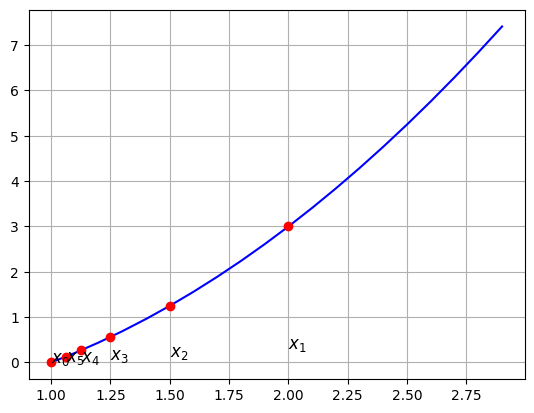

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return x**2 - 1

x = np.arange(1.0, 3.0, 0.1)

b = 3.0
a = -1.0
eps = 0.00001
iter = 0
xk   = []

while ((b-a) > eps)&(iter <= 5):
  print('[',a,',',b,']')
  x0 = (b+a)/2
  xk.append(x0)
  # Novo intervalo: [a, x0]
  if f(x0)*f(b) > 0:
    b = x0
  # Novo intervalo: [x0, b]  
  else:
    a = x0
  iter = iter + 1

plt.figure(figsize=(15, 15))
plt.figure()
plt.grid()
plt.plot(x,f(x),'b-')
cont = 0
for x in xk: 
  plt.plot(x, f(x), 'ro')
  name = '$x_' + str(cont) + '$'
  plt.text(x,0.1*f(x),name,fontsize=12)
  cont = cont + 1

print('[',a,',',b,']')
plt.show()

[ -1 , 1 ]
[ 0.0 , 1 ]
[ 0.0 , 0.5 ]
[ 0.0 , 0.25 ]
[ 0.0 , 0.125 ]
[ 0.0 , 0.0625 ]
[ 0.0 , 0.03125 ]
[ 0.0 , 0.015625 ]
[ 0.0 , 0.0078125 ]
[ 0.0 , 0.00390625 ]
[ 0.0 , 0.001953125 ]
[ 0.0 , 0.0009765625 ]
[ 0.0 , 0.00048828125 ]
[ 0.0 , 0.000244140625 ]
[ 0.0 , 0.0001220703125 ]


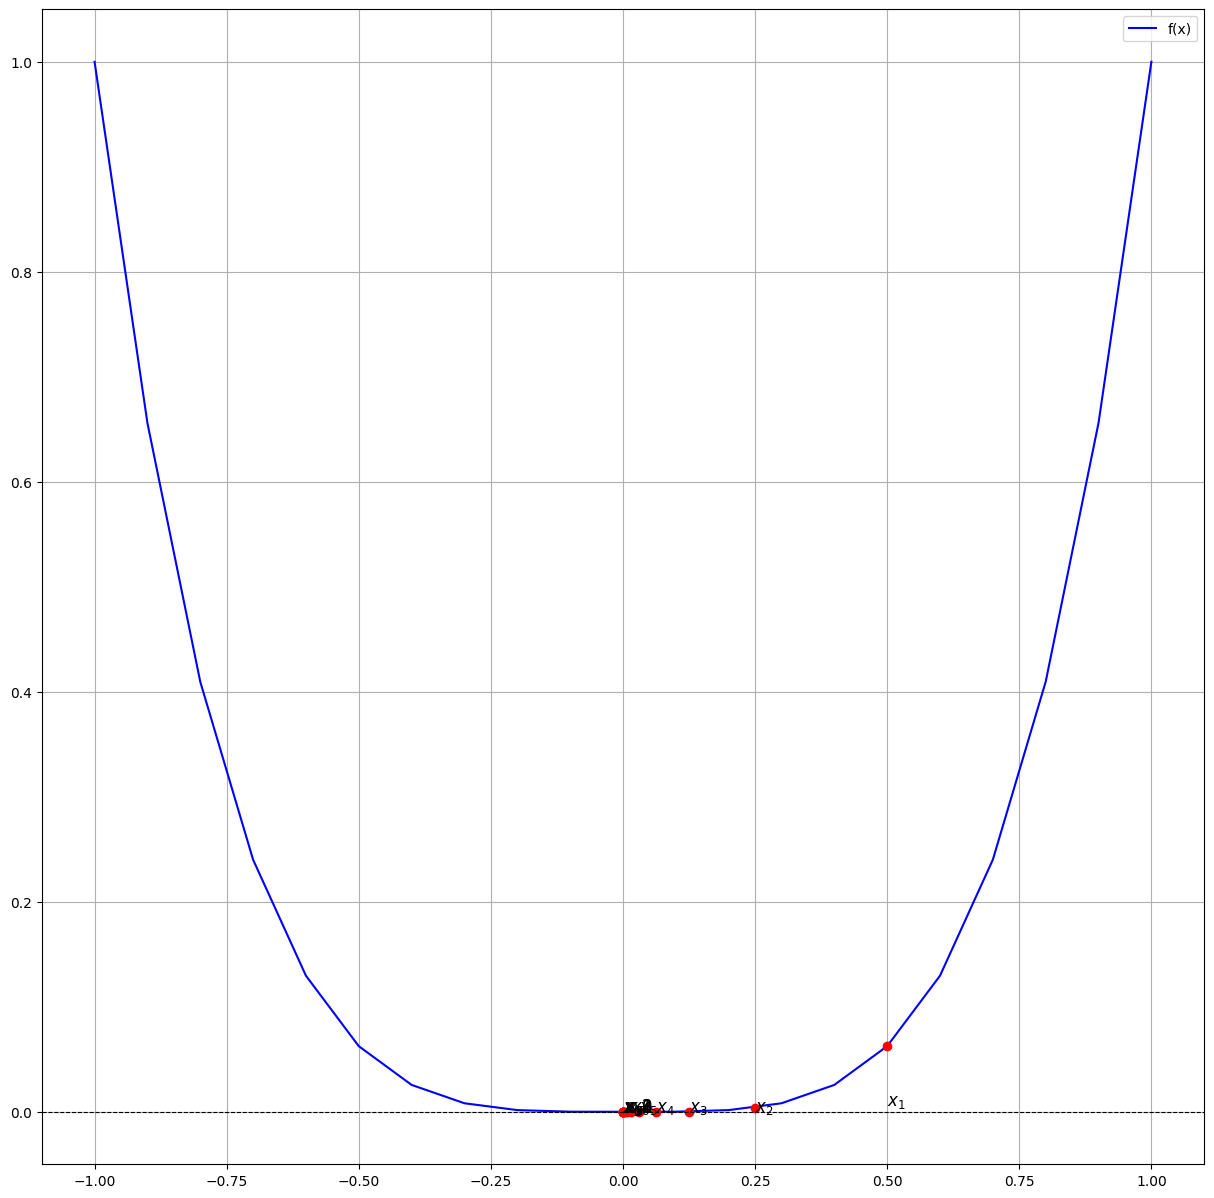

[ 0.0 , 6.103515625e-05 ]
Valor aproximado da raiz: 0.000030517578125


In [119]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**4

def bisection_method(f, a, b, eps, max_iter=10):
    

    iter = 0
    xk = []

    while ((b - a) > eps) and (iter < max_iter):
        print('[', a, ',', b, ']')
        x0 = (b + a) / 2
        xk.append(x0)
        if f(x0) * f(b) > 0:
            b = x0
        else:
            a = x0
        iter += 1

    x = np.arange(a - 1, b + 1, 0.1)
    plt.figure(figsize=(15, 15))
    plt.grid()
    plt.plot(x, f(x), 'b-', label='f(x)')
    cont = 0
    for x in xk:
        plt.plot(x, f(x), 'ro')  # Marca os pontos iterativos em vermelho
        name = '$x_' + str(cont) + '$'  # Nome do ponto, como x_0, x_1, ...
        plt.text(x, 0.1 * f(x), name, fontsize=12)  # Adiciona um rótulo próximo ao ponto no gráfico
        cont += 1
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.show()

    print('[', a, ',', b, ']')
    return (a + b) / 2  # Retorna o valor aproximado da raiz


a = -1  # Intervalo inferior
b = 1   # Intervalo superior
eps = 0.00001  # Precisão
max_iter = 15  # Número máximo de iterações

raiz = bisection_method(f, a, b, eps, max_iter)
if raiz is not None:
    print(f"Valor aproximado da raiz: {raiz:.15f}")
else:
    print("Não foi possível encontrar uma raiz no intervalo fornecido.")

O intervalo contém zero; continuando a busca com critério de |f(x0)| < eps.
[ -2 , 0.9 ]
[ -2 , -0.55 ]
[ -2 , -1.275 ]
[ -2 , -1.6375 ]
[ -2 , -1.81875 ]
[ -2 , -1.909375 ]
[ -2 , -1.9546875 ]
[ -2 , -1.97734375 ]
[ -2 , -1.988671875 ]
[ -2 , -1.9943359375 ]
[ -2 , -1.99716796875 ]
[ -2 , -1.998583984375 ]
[ -2 , -1.9992919921875 ]
[ -2 , -1.99964599609375 ]
[ -2 , -1.999822998046875 ]
[ -2 , -1.9999114990234375 ]
[ -2 , -1.9999557495117188 ]
[ -2 , -1.9999778747558594 ]
[ -2 , -1.9999889373779296 ]
[ -2 , -1.9999944686889648 ]
[ -2 , -1.9999972343444825 ]
[ -2 , -1.9999986171722413 ]
[ -2 , -1.9999993085861205 ]
[ -2 , -1.9999996542930603 ]
[ -2 , -1.9999998271465302 ]


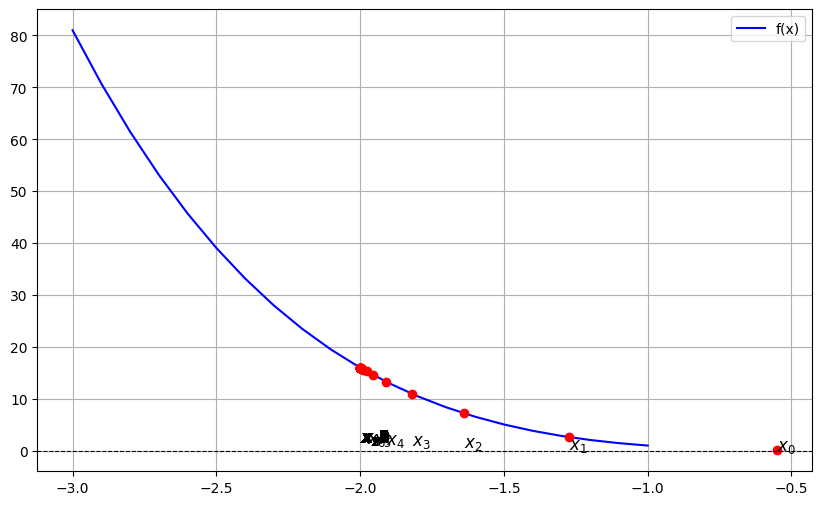

[ -2 , -1.9999999135732651 ]
Valor aproximado da raiz: -1.999999956786632


In [86]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**4

def bisection_method(f, a, b, eps=1e-8, max_iter=10):
    """
    Método da bissecção modificado para encontrar a raiz de uma função.
    Mesmo que a função não mude de sinal (por exemplo, f(x)=x^4),
    se o intervalo contém 0, o método tenta aproximar a raiz considerando |f(x0)| < eps.

    Parâmetros:
      f: função para a qual se deseja encontrar a raiz
      a: limite inferior do intervalo
      b: limite superior do intervalo
      eps: tolerância (critério de parada)
      max_iter: número máximo de iterações

    Retorna:
      Aproximação da raiz ou None se o intervalo for inválido.
    """
    # Se não houver mudança de sinal, verificar se o intervalo inclui zero
    if f(a) * f(b) > 0:
        if a <= 0 <= b:
            print("O intervalo contém zero; continuando a busca com critério de |f(x0)| < eps.")
        else:
            print("Erro: A função tem o mesmo sinal nos extremos do intervalo! Escolha um intervalo onde a função mude de sinal.")
            return None

    iter = 0
    xk = []  # Armazena os pontos médios gerados

    while ((b - a) > eps) and (iter < max_iter):
        print('[', a, ',', b, ']')
        x0 = (a + b) / 2.0
        xk.append(x0)

        if abs(f(x0)) < eps:
            print("Condição de parada atingida: |f(x0)| < eps")
            break

        if f(x0) * f(b) > 0:
            b = x0
        else:
            a = x0

        iter += 1

    # Plotando a função e os pontos iterativos
    x = np.arange(a - 1, b + 1, 0.1)
    plt.figure(figsize=(10, 6))
    plt.grid()
    plt.plot(x, f(x), 'b-', label='f(x)')
    
    cont = 0
    for x_val in xk:
        plt.plot(x_val, f(x_val), 'ro')  # Marca os pontos iterativos em vermelho
        name = f'$x_{cont}$'
        plt.text(x_val, 0.1 * f(x_val), name, fontsize=12)  # Rótulo próximo ao ponto
        cont += 1

    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.show()

    print('[', a, ',', b, ']')
    return (a + b) / 2.0  # Retorna a aproximação da raiz

# Testando o método com uma função que toca o eixo em x=0 (f(x)=x^4)
a = -2  # Intervalo inferior
b = 0.9   # Intervalo superior
eps = 1e-7  # Precisão
max_iter = 30  # Número máximo de iterações

raiz = bisection_method(f, a, b, eps, max_iter)
if raiz is not None:
    print(f"Valor aproximado da raiz: {raiz:.15f}")
